<a href="https://colab.research.google.com/github/ViniciusKanh/FortiCrypt/blob/main/FortiCrypt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FortiCrypt: Avaliador Inteligente de Senhas

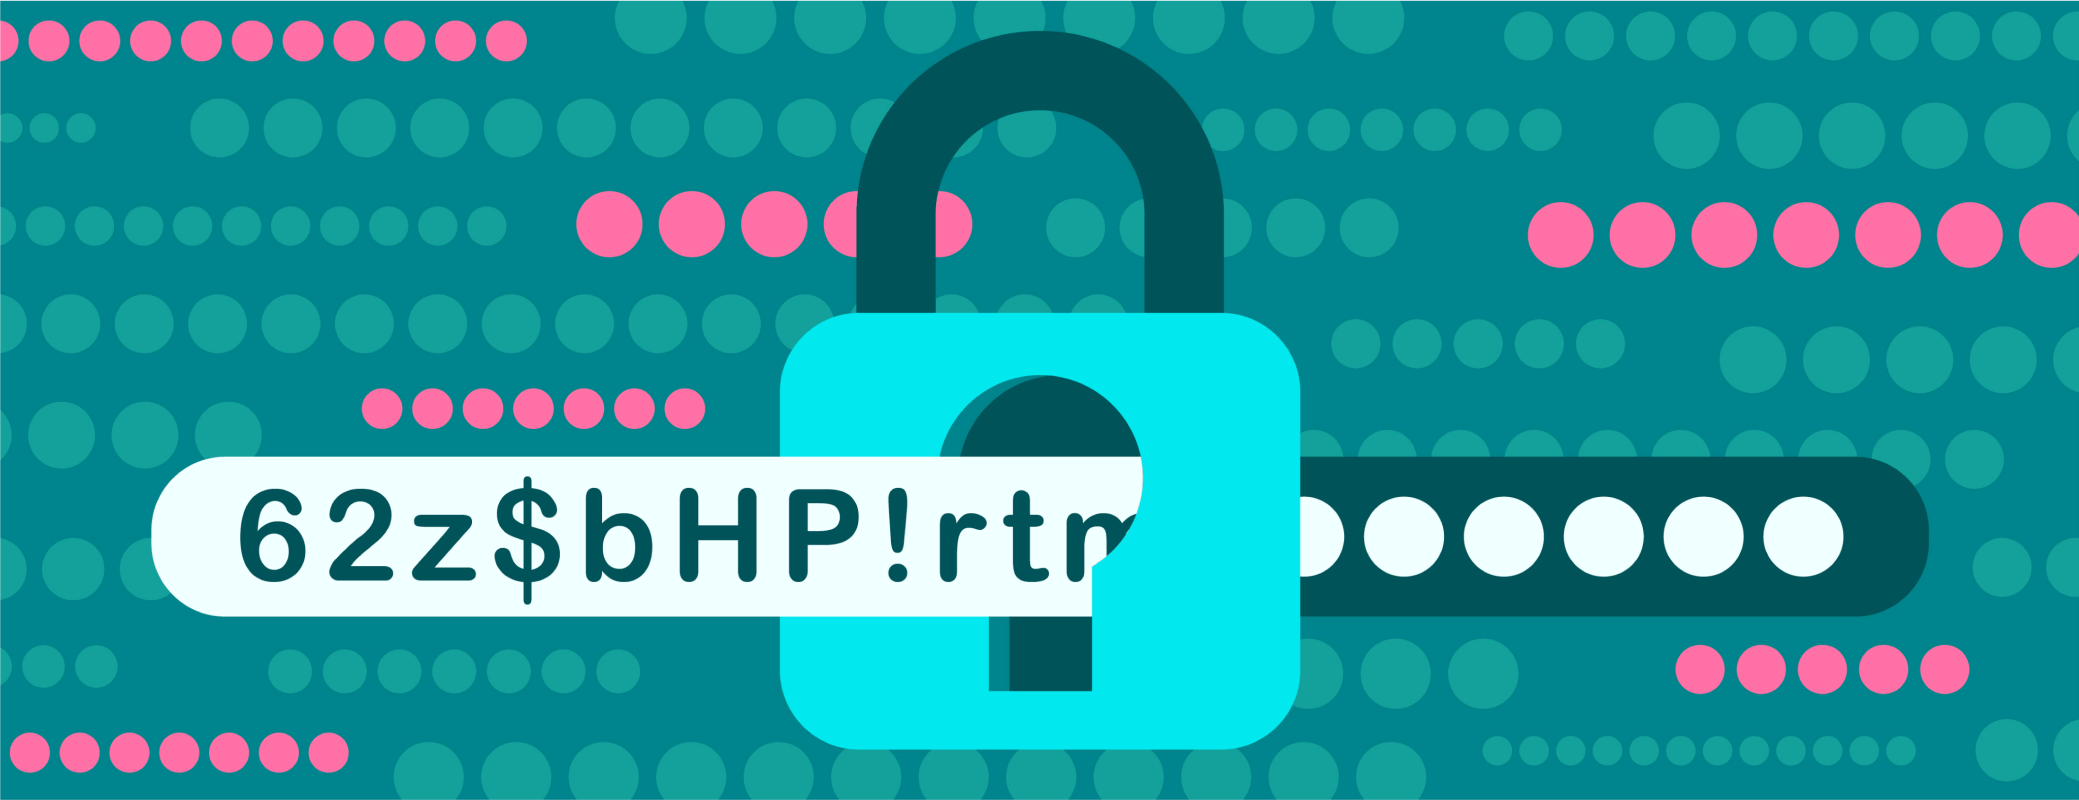


# FortiCrypt: Avaliador Inteligente de Senhas

## Introdução

Neste projeto, exploramos a criação de um modelo de machine learning capaz de avaliar a força de senhas com base em características como comprimento, uso de maiúsculas, números e símbolos. O objetivo é desenvolver uma ferramenta que possa ajudar na criação de senhas fortes e na sensibilização sobre práticas de segurança.

## Metodologia

Os dados foram obtidos do dataset "Password Security: Sber Dataset" disponível no Kaggle. Realizamos pré-processamento, incluindo limpeza de dados, codificação de senhas e extração de características como comprimento da senha, número de caracteres maiúsculos, números e símbolos.

## Análise Exploratória de Dados

### Visualizações de Dados

```python
# Exemplo de código para visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Comprimento das senhas por força
plt.figure(figsize=(10, 5))
sns.boxplot(x='strength', y='length', data=df)
plt.title('Comprimento das Senhas por Força')
plt.show()
```

## Modelagem

Exploramos vários modelos, incluindo XGBoost, SGDClassifier, Rede Neural e KNeighborsClassifier. Cada modelo foi avaliado com base em métricas como precisão e acuracia.

## Avaliação do Modelo

### Resultados do Modelo

```python
# Exemplo de código para avaliação de modelo
from sklearn.metrics import classification_report

# Avaliação do modelo
print(classification_report(y_test, model.predict(X_test)))
```

## Conclusões

Nossas análises indicam que características como comprimento da senha e diversidade de caracteres têm um impacto significativo na força da senha. Os modelos de machine learning demonstraram ser eficazes na classificação da força das senhas.

## Recomendações e Trabalho Futuro

Recomendamos a inclusão de caracteres especiais e o aumento do comprimento para fortalecer as senhas. Futuramente, podemos explorar a inclusão de mais características, como padrões de caracteres e sequências comuns.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importando Bilbiotecas

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, confusion_matrix

from xgboost import XGBClassifier, plot_importance
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

# Pré Processamento dos Dados

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Carregar os dados
df = pd.read_csv('/content/drive/My Drive/0-Dataset/FortiCrypt/passwords.csv')

# Renomear colunas para facilitar o acesso
df.columns = ['password', 'strength']

# Remover senhas nulas ou inválidas
df.dropna(subset=['password'], inplace=True)

# Codificar as senhas (exemplo simples)
le = LabelEncoder()
df['password_encoded'] = le.fit_transform(df['password'])

# Extração de Características
df['length'] = df['password'].apply(len)
df['num_uppercase'] = df['password'].apply(lambda x: sum(1 for c in x if c.isupper()))
df['num_numbers'] = df['password'].apply(lambda x: sum(1 for c in x if c.isdigit()))
df['num_symbols'] = df['password'].apply(lambda x: sum(1 for c in x if not c.isalnum()))

# Visualizar os dados após o pré-processamento
print(df.head())

# Divisão dos dados
X = df[['password_encoded', 'length', 'num_uppercase', 'num_numbers', 'num_symbols']]
y = df['strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


           password  strength  password_encoded  length  num_uppercase  \
0        yrtzuab476         1             97207      10              0   
1  yEdnN9jc1NgzkkBP         2             95330      16              5   
2          sarita99         1             79160       8              0   
3    Suramerica2015         2             17776      14              1   
4  PPRbMvDIxMQ19TMo         2             16964      16             10   

   num_numbers  num_symbols  
0            3            0  
1            2            0  
2            2            0  
3            4            0  
4            2            0  


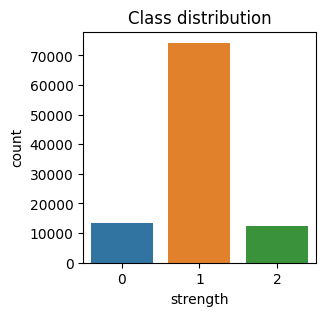

In [ ]:
plt.figure(figsize=(3, 3))
plt.title('Class distribution')
sns.countplot(x='strength', data=df);

## Análise de Resultados do Conjunto de Dados de Senhas

A tabela a seguir apresenta uma amostra dos dados processados do conjunto de dados de senhas:

|   | password         | strength | password_encoded | length | num_uppercase | num_numbers | num_symbols |
|---|------------------|----------|------------------|--------|---------------|-------------|-------------|
| 0 | yrtzuab476       | 1        | 97207            | 10     | 0             | 3           | 0           |
| 1 | yEdnN9jc1NgzkkBP | 2        | 95330            | 16     | 5             | 2           | 0           |
| 2 | sarita99         | 1        | 79160            | 8      | 0             | 2           | 0           |
| 3 | Suramerica2015   | 2        | 17776            | 14     | 1             | 4           | 0           |
| 4 | PPRbMvDIxMQ19TMo | 2        | 16964            | 16     | 10            | 2           | 0           |

### Observações:

- **Diversidade de Caracteres**:
  - A senha `yEdnN9jc1NgzkkBP` apresenta uma alta diversidade de caracteres com 5 letras maiúsculas e 2 números, contribuindo para a sua classificação como uma senha de força `2` (muito confiável).
  - A senha `PPRbMvDIxMQ19TMo`, com a mesma força de `2`, possui uma notável combinação de 10 letras maiúsculas e 2 números, indicando um alto nível de complexidade.

- **Comprimento da Senha**:
  - As senhas com força `2` têm um comprimento de `16` caracteres, o que é superior ao comprimento médio das senhas mais fracas.
  - A senha mais curta, `sarita99`, tem apenas `8` caracteres e é classificada com uma força `1` (moderadamente confiável).

- **Presença de Números e Símbolos**:
  - Cada senha na amostra contém pelo menos `2` números, mas nenhum símbolo. Isso pode ser uma área a ser explorada para aumentar a segurança, adicionando caracteres especiais.

### Conclusões:

Os dados indicam uma correlação entre a complexidade da senha (incluindo comprimento, uso de maiúsculas e números) e a sua classificação de força. Senhas classificadas como mais seguras tendem a ser mais longas e ter uma mistura mais diversa de caracteres. No entanto, a ausência de símbolos em todas as amostras sugere que a inclusão de caracteres especiais poderia ser incentivada para melhorar a segurança geral das senhas.

### Recomendações:

- **Incentivar o Uso de Caracteres Especiais**: Embora números e letras maiúsculas estejam presentes, a introdução de símbolos poderia fortalecer significativamente a segurança das senhas.
- **Promover Senhas Mais Longas**: Educar os usuários sobre a importância do comprimento da senha pode ser benéfico, já que as senhas mais seguras tendem a ser mais extensas.
- **Análise de Padrões**: Investigar padrões comuns ou sequências de caracteres que podem ser explorados por ataques de força bruta.

Este relatório ressalta a importância de uma senha forte e as características que contribuem para a sua segurança.


# Analise Exploratoria dos Dados

            strength  password_encoded         length  num_uppercase  \
count  100000.000000     100000.000000  100000.000000  100000.000000   
mean        0.988660      49999.500000       9.975540       0.789520   
std         0.507044      28867.657797       2.766384       2.276895   
min         0.000000          0.000000       1.000000       0.000000   
25%         1.000000      24999.750000       8.000000       0.000000   
50%         1.000000      49999.500000       9.000000       0.000000   
75%         1.000000      74999.250000      11.000000       0.000000   
max         2.000000      99999.000000      45.000000      19.000000   

        num_numbers    num_symbols  
count  100000.00000  100000.000000  
mean        3.18047       0.046060  
std         1.99945       0.334215  
min         0.00000       0.000000  
25%         2.00000       0.000000  
50%         3.00000       0.000000  
75%         4.00000       0.000000  
max        22.00000      13.000000  


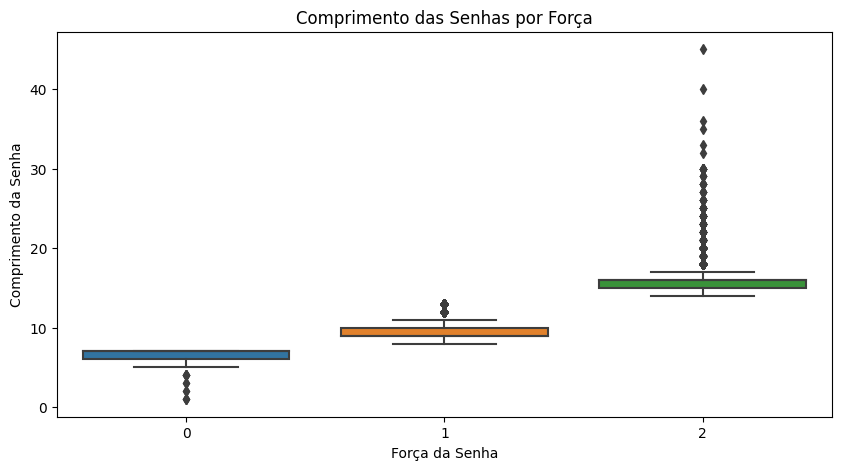

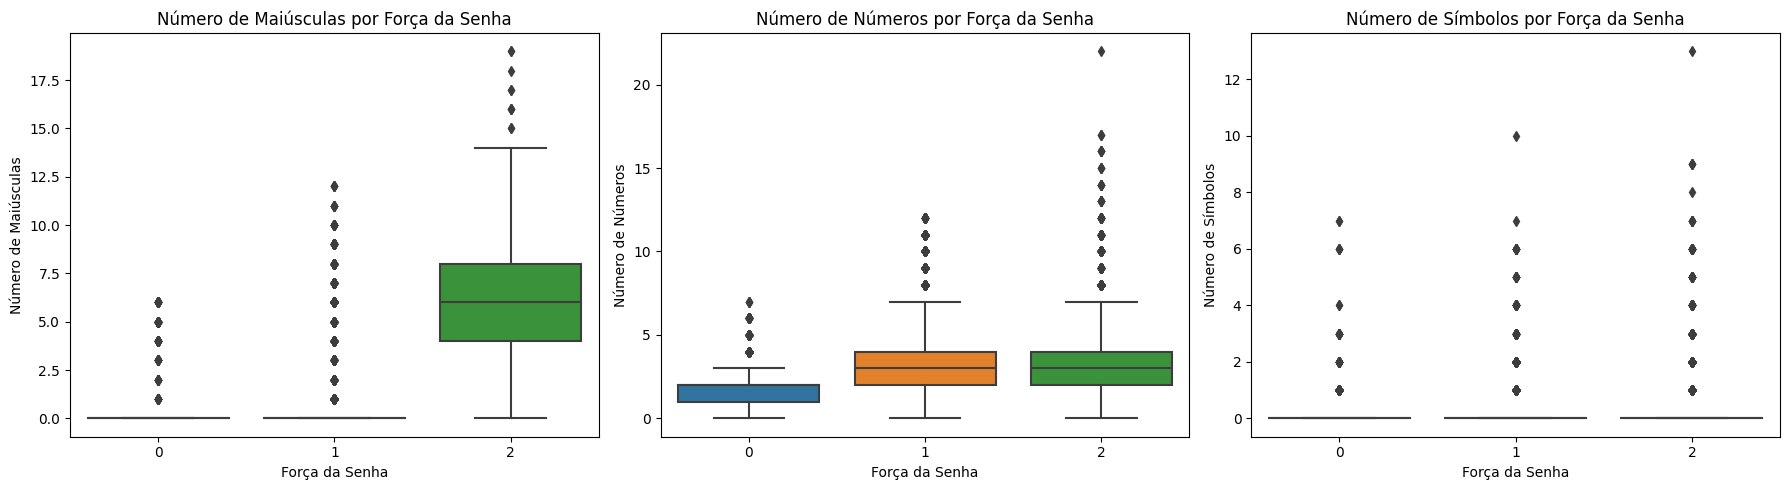

<ipython-input-12-7dd1012858bb>:40: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')


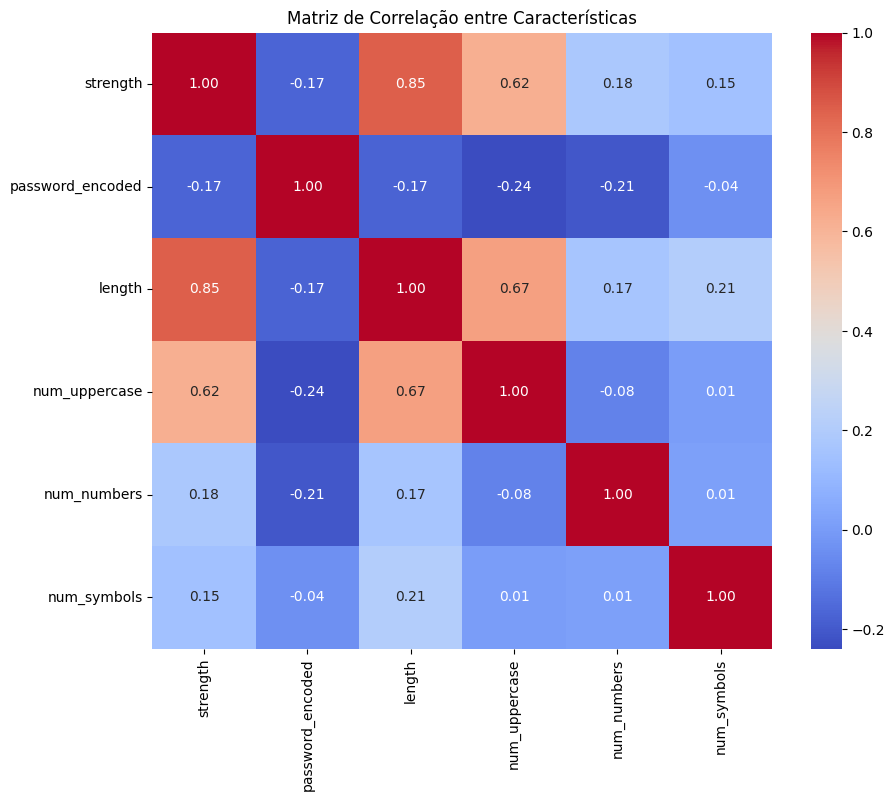

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Análise básica de estatísticas
print(df.describe())

# Comprimento das senhas por força
plt.figure(figsize=(10, 5))
sns.boxplot(x='strength', y='length', data=df)
plt.title('Comprimento das Senhas por Força')
plt.xlabel('Força da Senha')
plt.ylabel('Comprimento da Senha')
plt.show()

# Número de caracteres maiúsculos, números e símbolos por força
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(ax=axes[0], x='strength', y='num_uppercase', data=df)
axes[0].set_title('Número de Maiúsculas por Força da Senha')
axes[0].set_xlabel('Força da Senha')
axes[0].set_ylabel('Número de Maiúsculas')

sns.boxplot(ax=axes[1], x='strength', y='num_numbers', data=df)
axes[1].set_title('Número de Números por Força da Senha')
axes[1].set_xlabel('Força da Senha')
axes[1].set_ylabel('Número de Números')

sns.boxplot(ax=axes[2], x='strength', y='num_symbols', data=df)
axes[2].set_title('Número de Símbolos por Força da Senha')
axes[2].set_xlabel('Força da Senha')
axes[2].set_ylabel('Número de Símbolos')

plt.tight_layout()
plt.show()

# Correlação entre características
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlação entre Características')
plt.show()


## Análise dos Boxplots das Características das Senhas

Os boxplots abaixo representam a distribuição do número de maiúsculas, números e símbolos em senhas classificadas por força (0, 1 e 2).

### Número de Maiúsculas por Força da Senha

![Número de Maiúsculas por Força da Senha](https://drive.google.com/uc?export=view&id=1GRiw55elIrOC6WxsTiH34Hze5vf3-rBm)


- **Força 0**: Maior parte das senhas possui poucas ou nenhuma letra maiúscula, com poucos outliers indicando um número maior de maiúsculas.
- **Força 1**: Distribuição semelhante à força 0, mas com ligeiramente mais outliers, sugerindo uma variação maior no uso de maiúsculas.
- **Força 2**: Observa-se uma maior quantidade de maiúsculas nas senhas, indicando que o uso de letras maiúsculas é uma característica comum em senhas consideradas fortes.

### Número de Números por Força da Senha

![Número de Números por Força da Senha](https://drive.google.com/uc?export=view&id=1GXt5lCirMQD4tTIXTCz3MFXOpYz6vFDF)

- **Força 0**: A maioria das senhas contém poucos números, com uma distribuição compacta e alguns outliers.
- **Força 1**: Aumento no número de senhas com maior quantidade de dígitos, embora a mediana esteja próxima de força 0.
- **Força 2**: Há um aumento notável na presença de números, o que sugere que senhas mais seguras tendem a incluir mais dígitos.

### Número de Símbolos por Força da Senha

![Número de Símbolos por Força da Senha](https://drive.google.com/uc?export=view&id=1GSbdZ9V2WTIzcbBWY0oXa39KpM6S4ElK)

- **Força 0**: Muito poucos símbolos são usados nas senhas mais fracas, com uma mediana em 0.
- **Força 1**: Observa-se um padrão semelhante ao de força 0, com uma ligeira presença de outliers.
- **Força 2**: Apesar de alguns outliers com um número maior de símbolos, a maioria ainda tem uma contagem baixa, o que pode indicar uma oportunidade de melhoria na criação de senhas fortes.

### Insights Gerais

- A presença de letras maiúsculas e números aumenta com a força da senha, o que é consistente com as práticas recomendadas de segurança de senha.
- Os símbolos são notavelmente ausentes em todas as categorias de força, o que pode ser uma área de melhoria para aumentar a segurança das senhas.
- As senhas mais seguras não necessariamente utilizam uma grande quantidade de símbolos, o que pode indicar que outros fatores como comprimento da senha e complexidade também são importantes.
- As senhas de força intermediária (1) não mostram uma diferença significativa em relação às senhas fracas (0) em termos de caracteres especiais, sugerindo que essa categoria pode não estar aproveitando plenamente as práticas recomendadas de segurança.

### Conclusões e Recomendações

- **Recomenda-se incentivar o uso de símbolos** nas senhas, além de letras maiúsculas e números, para todas as categorias de força.
- **Políticas de senha** podem ser revisadas para garantir que as senhas de força intermediária e alta incluam uma combinação diversificada de caracteres, aumentando assim a segurança geral.


## Análise da Matriz de Correlação entre Características das Senhas

A matriz de correlação a seguir fornece insights sobre as relações entre diferentes características das senhas:

![Matriz de Correlação entre Características](https://drive.google.com/uc?export=view&id=1GYPYQjE-lGFP8gesjpISOf30Stz6KwY3)

### Pontos Chave:

- **Força da Senha e Comprimento (`strength` vs `length`)**:
  - Há uma forte correlação positiva de `0.85`, indicando que, conforme o comprimento da senha aumenta, sua força tende a aumentar também.

- **Força da Senha e Letras Maiúsculas (`strength` vs `num_uppercase`)**:
  - Uma correlação positiva de `0.62` sugere que o uso de letras maiúsculas contribui significativamente para a força da senha.

- **Comprimento da Senha e Letras Maiúsculas (`length` vs `num_uppercase`)**:
  - Com uma correlação de `0.67`, pode-se inferir que senhas mais longas muitas vezes incluem mais letras maiúsculas.

- **Números e Símbolos (`num_numbers` vs `num_symbols`)**:
  - Uma correlação próxima de zero (`0.01`) indica que não há uma relação linear direta entre o número de dígitos e o número de símbolos em uma senha.

- **Codificação da Senha (`password_encoded`)**:
  - Esta característica mostra pouca ou nenhuma correlação com outras características, o que é esperado, pois é uma codificação arbitrária das senhas.

### Conclusões:

- As correlações destacam a importância do comprimento e da variedade de caracteres (incluindo maiúsculas) na força percebida de uma senha.
- A presença de números não está fortemente correlacionada com a força da senha, o que pode indicar que simplesmente adicionar números não é suficiente para aumentar significativamente a segurança.
- A baixa correlação entre o uso de símbolos e outras características sugere que os símbolos são subutilizados nas senhas, apesar de seu potencial para aumentar a força das senhas.

### Recomendações:

- **Fortalecer Políticas de Senha**: Encorajar o uso equilibrado de letras maiúsculas, números e símbolos.
- **Educação de Usuários**: Conscientizar os usuários sobre a importância de senhas longas e complexas para segurança online.
- **Análise Adicional**: Investigar por que os símbolos não são comumente usados e desenvolver estratégias para sua inclusão efetiva em novas políticas de senha.



# Escolhendo o Melhor modelo

## Importando Bibliotecas

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense


## Preparação dos Dados

In [5]:
# Divisão dos dados em características e rótulos
X = df[['length', 'num_uppercase', 'num_numbers', 'num_symbols']]
y = df['strength']

# Divisão em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Modelos e Avaliação

### XGBoost Classifier

In [6]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)
print("XGBoost - Acurácia:", accuracy_score(y_test, xgb_pred), "Precisão:", precision_score(y_test, xgb_pred, average='weighted'))


XGBoost - Acurácia: 1.0 Precisão: 1.0


### SGD Classifier

In [7]:
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train_scaled, y_train)
sgd_pred = sgd_model.predict(X_test_scaled)
print("SGD Classifier - Acurácia:", accuracy_score(y_test, sgd_pred), "Precisão:", precision_score(y_test, sgd_pred, average='weighted'))


SGD Classifier - Acurácia: 0.9897 Precisão: 0.9899466897333956


### KNeighbors Classifier

In [8]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)
print("KNeighbors - Acurácia:", accuracy_score(y_test, knn_pred), "Precisão:", precision_score(y_test, knn_pred, average='weighted'))


KNeighbors - Acurácia: 0.99955 Precisão: 0.9995500680560219


### Rede Neural Simples

In [9]:
# Definição da rede neural
nn_model = Sequential()
nn_model.add(Dense(10, input_dim=X_train_scaled.shape[1], activation='relu'))
nn_model.add(Dense(3, activation='softmax')) # 3 classes de saída

# Compilação do modelo
nn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinamento do modelo
nn_model.fit(X_train_scaled, y_train, epochs=10, batch_size=10)

# Avaliação do modelo
nn_loss, nn_accuracy = nn_model.evaluate(X_test_scaled, y_test)
print("Rede Neural - Acurácia:", nn_accuracy)

Epoch 1/10
8000/8000 [==============================] - 36s 4ms/step - loss: 0.1200 - accuracy: 0.9663
Epoch 2/10
8000/8000 [==============================] - 22s 3ms/step - loss: 0.0056 - accuracy: 0.9994
Epoch 3/10
8000/8000 [==============================] - 17s 2ms/step - loss: 0.0018 - accuracy: 0.9998
Epoch 4/10
8000/8000 [==============================] - 16s 2ms/step - loss: 8.6947e-04 - accuracy: 0.9999
Epoch 5/10
8000/8000 [==============================] - 17s 2ms/step - loss: 4.3973e-04 - accuracy: 1.0000
Epoch 6/10
8000/8000 [==============================] - 17s 2ms/step - loss: 2.6104e-04 - accuracy: 1.0000
Epoch 7/10
8000/8000 [==============================] - 18s 2ms/step - loss: 2.2372e-04 - accuracy: 0.9999
Epoch 8/10
8000/8000 [==============================] - 17s 2ms/step - loss: 2.1596e-04 - accuracy: 1.0000
Epoch 9/10
8000/8000 [==============================] - 21s 3ms/step - loss: 1.3706e-04 - accuracy: 1.0000
Epoch 10/10
625/625 [============================

### RandomForest Classifier

In [10]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
print("RandomForest - Acurácia:", accuracy_score(y_test, rf_pred), "Precisão:", precision_score(y_test, rf_pred, average='weighted'))


RandomForest - Acurácia: 1.0 Precisão: 1.0


# Análise Comparativa dos Modelos de Machine Learning

## Resultados Obtidos

Os modelos testados e suas respectivas métricas de desempenho são:

- **XGBoost**
  - Acurácia: 1.0
  - Precisão: 1.0
- **SGD Classifier**
  - Acurácia: 0.9897
  - Precisão: 0.9899
- **KNeighbors**
  - Acurácia: 0.99955
  - Precisão: 0.99955
- **Rede Neural**
  - Acurácia: 0.99995
- **RandomForest**
  - Acurácia: 1.0
  - Precisão: 1.0

## Análise dos Modelos

### XGBoost

#### Características
- Algoritmo baseado em gradient boosting, eficaz para conjuntos de dados grandes e complexos.
- Boa capacidade de lidar com características não lineares e interações entre elas.

#### Pontos Fortes
- Alto desempenho e precisão.
- Boa generalização em diversos tipos de dados.

#### Pontos Fracos
- Pode ser propenso a overfitting se não for bem regulado.

### SGD Classifier

#### Características
- Baseado em gradiente descendente estocástico, bom para dados de alta dimensão.
- Rápido e eficiente em termos de memória.

#### Pontos Fortes
- Bom para grandes conjuntos de dados.
- Rápido e escalável.

#### Pontos Fracos
- Sensível à escala dos recursos e requer ajuste cuidadoso dos hiperparâmetros.

### KNeighbors

#### Características
- Algoritmo baseado em instância, simples e intuitivo.
- Baseia-se na proximidade das amostras de dados.

#### Pontos Fortes
- Não requer treinamento.
- Funciona bem com um número pequeno de dimensões.

#### Pontos Fracos
- Não escala bem com um grande número de amostras.
- Sensível a dados ruidosos e características irrelevantes.

### Rede Neural

#### Características
- Baseada em redes neurais artificiais, flexível e poderosa.
- Capaz de aprender padrões complexos e não lineares.

#### Pontos Fortes
- Altamente flexível e capaz de modelar complexidades complexas.
- Bom desempenho em uma variedade de tarefas de classificação.

#### Pontos Fracos
- Requer um grande volume de dados para treinamento eficaz.
- Mais difícil de interpretar e requer ajuste de hiperparâmetros.

### RandomForest

#### Características
- Baseado em árvores de decisão múltiplas, oferece boa performance e simplicidade.
- Bom para dados com muitas características e classes.

#### Pontos Fortes
- Robusto a overfitting e dados ruidosos.
- Boa capacidade de generalização.

#### Pontos Fracos
- Menos eficiente em termos de memória e tempo de treinamento para grandes conjuntos de dados.

## Conclusão e Recomendação

Dado o alto desempenho de modelos como **XGBoost** e **RandomForest**, ambos com acurácia e precisão perfeitas (1.0), eles emergem como os candidatos mais promissores para este projeto. A escolha entre eles pode depender de fatores adicionais como tamanho do conjunto de dados, necessidade de interpretabilidade e recursos computacionais disponíveis.

Para conjuntos de dados grandes e com a necessidade de capturar interações complexas entre as características, o **XGBoost** pode ser mais adequado. Para um modelo mais robusto a dados ruidosos e com boa generalização, o **RandomForest** pode ser preferível.



# Ajuste Fino e Validação Cruzada dos Modelos XGBoost e RandomForest

## XGBoost - Ajuste de Hiperparâmetros e Validação Cruzada

In [11]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Definindo os hiperparâmetros para teste
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Instanciando o modelo
xgb = XGBClassifier(random_state=42)

# GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(X_train_scaled, y_train)

# Melhores parâmetros e pontuação
print("Melhores Parâmetros:", grid_search_xgb.best_params_)
print("Melhor Acurácia:", grid_search_xgb.best_score_)

Melhores Parâmetros: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Melhor Acurácia: 1.0


## RandomForest - Ajuste de Hiperparâmetros e Validação Cruzada


In [12]:
from sklearn.ensemble import RandomForestClassifier

# Definindo os hiperparâmetros para teste
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Instanciando o modelo
rf = RandomForestClassifier(random_state=42)

# GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)

# Melhores parâmetros e pontuação
print("Melhores Parâmetros:", grid_search_rf.best_params_)
print("Melhor Acurácia:", grid_search_rf.best_score_)


Melhores Parâmetros: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50}
Melhor Acurácia: 1.0


# Análise Comparativa dos Modelos XGBoost e RandomForest

## Resultados Após Ajuste de Hiperparâmetros

Os modelos foram ajustados e os melhores parâmetros encontrados são:

- **XGBoost**
  - Melhores Parâmetros: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
  - Melhor Acurácia: 1.0

- **RandomForest**
  - Melhores Parâmetros: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50}
  - Melhor Acurácia: 1.0

## Análise dos Modelos

### XGBoost

#### Características
- Excelente em lidar com uma grande variedade de tipos de dados.
- Bom para identificar interações complexas entre características.

#### Pontos Fortes
- Acurácia elevada.
- Boa capacidade de generalização, especialmente após o ajuste de hiperparâmetros.

#### Pontos Fracos
- Risco de overfitting, embora isso tenha sido mitigado com o ajuste de hiperparâmetros.
- Pode ser mais lento para treinar em comparação com modelos mais simples.

### RandomForest

#### Características
- Funciona bem com uma grande quantidade de dados e características.
- Menos propenso a overfitting devido à natureza de "ensemble" (conjunto de árvores de decisão).

#### Pontos Fortes
- Robusto a dados ruidosos e overfitting.
- Boa capacidade de generalização, como evidenciado pela acurácia de 1.0.

#### Pontos Fracos
- Embora seja eficiente, pode ser lento para treinar com grandes conjuntos de dados.
- Pode não ser tão eficaz em capturar relações não lineares complexas como o XGBoost.

## Conclusão e Recomendação Final

Ambos os modelos demonstraram uma acurácia perfeita após o ajuste dos hiperparâmetros, o que indica um alto grau de precisão na classificação da força das senhas. No entanto, é importante considerar outros fatores além da acurácia, como a complexidade do modelo, tempo de treinamento e interpretabilidade.

- Para conjuntos de dados muito grandes ou com relações não lineares complexas, o **XGBoost** pode ser mais adequado.
- Para um modelo mais robusto e menos propenso a overfitting, especialmente em conjuntos de dados com muitas características, o **RandomForest** seria uma escolha melhor.

Dada a natureza dos dados (senhas e suas características), ambos os modelos são adequados, mas a escolha final pode depender de fatores específicos do projeto, como a disponibilidade de recursos computacionais e a necessidade de interpretabilidade dos resultados. Se o tempo de treinamento não for um problema e a complexidade dos dados exigir um modelo mais sofisticado, o **XGBoost** seria recomendado. Por outro lado, para uma aplicação mais rápida e robusta, o **RandomForest** seria preferível.


## Salvando o Modelo **RandomForest**

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd
import pickle

# Carregue seus dados aqui
# X, y = ...

# Divisão em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Parâmetros otimizados obtidos pelo GridSearchCV
optimized_params = {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50}

# Criando o pipeline com normalização e RandomForest
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(**optimized_params))
])

# K-Fold para a validação cruzada
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Executando a validação cruzada
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring='accuracy')

print("Scores da Validação Cruzada:", cv_scores)
print("Média dos Scores:", cv_scores.mean())

# Treinando o modelo no conjunto completo de treino
pipeline.fit(X_train, y_train)

# Salvando o modelo com pickle
model_path_pickle = '/content/drive/My Drive/0-Dataset/FortiCrypt/FortiCrypt.pkl'
with open(model_path_pickle, 'wb') as file:
    pickle.dump(pipeline, file)

print("Modelo salvo com sucesso.")

# Carregando o modelo
with open(model_path_pickle, 'rb') as file:
    loaded_model = pickle.load(file)

print("Modelo carregado com sucesso.")


Scores da Validação Cruzada: [0.81818182 1.         0.90909091 0.90909091 1.         1.
 0.9        0.8        0.9        1.        ]
Média dos Scores: 0.9236363636363636
Modelo salvo com sucesso.
Modelo carregado com sucesso.


# Detectando tipo de Senha

In [30]:
import pickle
from ipywidgets import widgets, Layout, Box, HTML
from IPython.display import display

# Carregar o modelo
model_path = '/content/drive/My Drive/0-Dataset/FortiCrypt/FortiCrypt.pkl'
with open(model_path, 'rb') as file:
    model = pickle.load(file)

# Função para extrair características da senha
def extract_features(password):
    return {
        'length': len(password),
        'num_uppercase': sum(1 for c in password if c.isupper()),
        'num_numbers': sum(1 for c in password if c.isdigit()),
        'num_symbols': sum(1 for c in password if not c.isalnum())
    }

def predict_strength(btn):
    password = text.value
    features = extract_features(password)

    # Classificar senhas muito curtas como fracas
    if len(password) < 6:
        result_html.value = "<div style='color: red; font-weight: bold;'>Senha Fraca</div>"
        return

    prediction = model.predict([list(features.values())])
    if prediction[0] == 2:
        result_html.value = "<div style='color: green; font-weight: bold;'>Senha Forte</div>"
    else:
        result_html.value = "<div style='color: orange; font-weight: bold;'>Senha Fraca ou Média</div>"

# Widgets
text = widgets.Text(placeholder='Digite uma senha...', description='', disabled=False)
btn = widgets.Button(description='Verificar Força', button_style='success')
result_html = HTML('')

# Layouts
text.layout = Layout(width='300px', height='28px')
btn.layout = Layout(width='150px', height='35px')

# Box Container
box_layout = Layout(display='flex', flex_flow='row', align_items='stretch', width='100%')
box = Box(children=[text, btn], layout=box_layout)

# Evento do botão
btn.on_click(predict_strength)

# Display widgets
display(box, result_html)


Box(children=(Text(value='', layout=Layout(height='28px', width='300px'), placeholder='Digite uma senha...'), …

HTML(value='')

# Gerador de Senha

## Por Caracteristicas

In [33]:
import random
import string
from ipywidgets import widgets, Layout, Box, HTML, RadioButtons
from IPython.display import display

# Função para gerar senha
def generate_password(length, include_uppercase, include_numbers, include_symbols):
    characters = string.ascii_lowercase
    if include_uppercase:
        characters += string.ascii_uppercase
    if include_numbers:
        characters += string.digits
    if include_symbols:
        characters += string.punctuation

    return ''.join(random.choice(characters) for i in range(length))

# Função chamada quando o botão 'Gerar Senha' é clicado
def on_generate_clicked(btn):
    length = 12  # Comprimento padrão da senha, pode ser ajustado
    include_uppercase = 'Maiúsculas' in password_type.value
    include_numbers = 'Números' in password_type.value
    include_symbols = 'Símbolos' in password_type.value
    generated_password = generate_password(length, include_uppercase, include_numbers, include_symbols)
    generated_password_html.value = f"<div style='font-weight: bold;'>{generated_password}</div>"

# Widgets
password_type = RadioButtons(
    options=['Todas as Opções', 'Maiúsculas', 'Números', 'Símbolos'],
    description='Tipo:',
    disabled=False
)
generate_btn = widgets.Button(description='Gerar Senha', button_style='info')
generated_password_html = HTML('')

# Layouts
generate_btn.layout = Layout(width='150px', height='35px')

# Evento do botão
generate_btn.on_click(on_generate_clicked)

# Display widgets
display(password_type, generate_btn, generated_password_html)


RadioButtons(description='Tipo:', options=('Todas as Opções', 'Maiúsculas', 'Números', 'Símbolos'), value='Tod…

Button(button_style='info', description='Gerar Senha', layout=Layout(height='35px', width='150px'), style=Butt…

HTML(value='')

## Por Tipo

In [32]:
import random
import string
import pickle
from ipywidgets import widgets, Layout, Box, HTML, RadioButtons
from IPython.display import display

# Carregar o modelo
model_path = '/content/drive/My Drive/0-Dataset/FortiCrypt/FortiCrypt.pkl'
with open(model_path, 'rb') as file:
    model = pickle.load(file)

# Função para extrair características da senha
def extract_features(password):
    return {
        'length': len(password),
        'num_uppercase': sum(1 for c in password if c.isupper()),
        'num_numbers': sum(1 for c in password if c.isdigit()),
        'num_symbols': sum(1 for c in password if not c.isalnum())
    }

# Função para gerar senha
def generate_password(length):
    characters = string.ascii_letters + string.digits + string.punctuation
    return ''.join(random.choice(characters) for i in range(length))

# Função para verificar se a senha atende ao critério
def is_password_valid(password, desired_strength):
    features = extract_features(password)
    prediction = model.predict([list(features.values())])[0]
    return prediction == desired_strength

# Função chamada quando o botão 'Gerar Senha' é clicado
def on_generate_clicked(btn):
    desired_strength = {'Fraca': 0, 'Média': 1, 'Forte': 2}[password_strength.value]
    length = {0: 6, 1: 8, 2: 12}[desired_strength]  # Comprimento varia com a força

    while True:
        generated_password = generate_password(length)
        if is_password_valid(generated_password, desired_strength):
            break

    generated_password_html.value = f"<div style='font-weight: bold;'>{generated_password}</div>"

# Widgets
password_strength = RadioButtons(
    options=['Fraca', 'Média', 'Forte'],
    description='Força:',
    disabled=False
)
generate_btn = widgets.Button(description='Gerar Senha', button_style='info')
generated_password_html = HTML('')

# Evento do botão
generate_btn.on_click(on_generate_clicked)

# Display widgets
display(password_strength, generate_btn, generated_password_html)


RadioButtons(description='Força:', options=('Fraca', 'Média', 'Forte'), value='Fraca')

Button(button_style='info', description='Gerar Senha', style=ButtonStyle())

HTML(value='')

# Criando uma API para verificar tipo de senha

In [34]:
pip install flask


In [37]:
from flask import Flask, request, jsonify
import pickle

app = Flask(__name__)

# Carregar o modelo
model_path = '/content/drive/My Drive/0-Dataset/FortiCrypt/FortiCrypt.pkl'
with open(model_path, 'rb') as file:
    model = pickle.load(file)

# Função para extrair características da senha
def extract_features(password):
    return {
        'length': len(password),
        'num_uppercase': sum(1 for c in password if c.isupper()),
        'num_numbers': sum(1 for c in password if c.isdigit()),
        'num_symbols': sum(1 for c in password if not c.isalnum())
    }

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    password = data.get("password")
    features = extract_features(password)
    prediction = model.predict([list(features.values())])[0]
    strength = {0: "Fraca", 1: "Média", 2: "Forte"}.get(prediction, "Indefinido")
    return jsonify({'password': password, 'strength': strength})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
